In [12]:
# Imports libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import sys

sys.path.append("../")

# Import user-defined packages
from scripts.utils.utils import Utils as utils

In [13]:
# Step 1: Load data
df = pd.read_csv("../data/raw/data_train.csv")

df

,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,0,0,0,1,24,1,0,0,1,0,...,0,0,0,0,8,4,5,60,0,0
1,1,0,0,1,28,0,0,0,1,1,...,1,0,0,0,2,6,8,0,-64,0
2,2,0,0,1,36,1,0,0,1,1,...,30,30,1,0,3,2,1,-46,0,0
3,3,0,1,1,35,0,0,0,1,1,...,0,0,0,0,8,6,8,-83,-188,0
4,4,0,1,1,27,0,0,0,1,0,...,0,0,0,0,9,5,4,-58,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202939,202939,0,0,1,29,0,0,0,1,0,...,10,2,0,0,8,6,7,-66,4,0
202940,202940,0,0,1,23,0,0,0,1,0,...,0,0,0,0,11,5,7,0,-84,0
202941,202941,1,1,1,38,0,0,0,1,1,...,0,2,0,1,10,6,6,-57,-16,0
202942,202942,0,1,1,22,0,0,0,1,1,...,0,14,0,0,9,6,7,59,0,0


In [14]:
# Step 2: Inspect data
# Note: Given that all features have 202944 non-null counts and the dataset has 202944 rows, it's likely that there are no null values present.
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202944 entries, 0 to 202943
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Id                    202944 non-null  int64
 1   HighBP                202944 non-null  int64
 2   HighChol              202944 non-null  int64
 3   CholCheck             202944 non-null  int64
 4   BMI                   202944 non-null  int64
 5   Smoker                202944 non-null  int64
 6   Stroke                202944 non-null  int64
 7   HeartDiseaseorAttack  202944 non-null  int64
 8   PhysActivity          202944 non-null  int64
 9   Fruits                202944 non-null  int64
 10  Veggies               202944 non-null  int64
 11  HvyAlcoholConsump     202944 non-null  int64
 12  AnyHealthcare         202944 non-null  int64
 13  NoDocbcCost           202944 non-null  int64
 14  GenHlth               202944 non-null  int64
 15  MentHlth              202944 non-n

In [15]:
# Step 3.1: Remove unused column(s)
df.drop(
    columns=["Id"],
    inplace=True,
)

# Step 3.2: Remove duplicate row(S)
df.drop_duplicates(inplace=True)

In [16]:
# Step 4: Handle invalid datas (non numerical)

# Convert all features to numeric
df = df.apply(pd.to_numeric, errors="coerce")

# Summarize invalid data per feature
df.isna().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
ExtraMedTest            0
ExtraAlcoholTest        0
Status                  0
dtype: int64

In [17]:
# # Step 5: Feature scaling

# # Min-max scaling is applied to maintain uniformity within the data range.
# # Formular: X = (X - min) / (max - min)
# min_max_scaler = MinMaxScaler()

# columns_to_scale = ["BMI", "ExtraMedTest", "ExtraAlcoholTest", "MentHlth", "PhysHlth"]
# df[columns_to_scale] = min_max_scaler.fit_transform(df[columns_to_scale])

# # Inspect data after scaling
# df.describe().round(3)

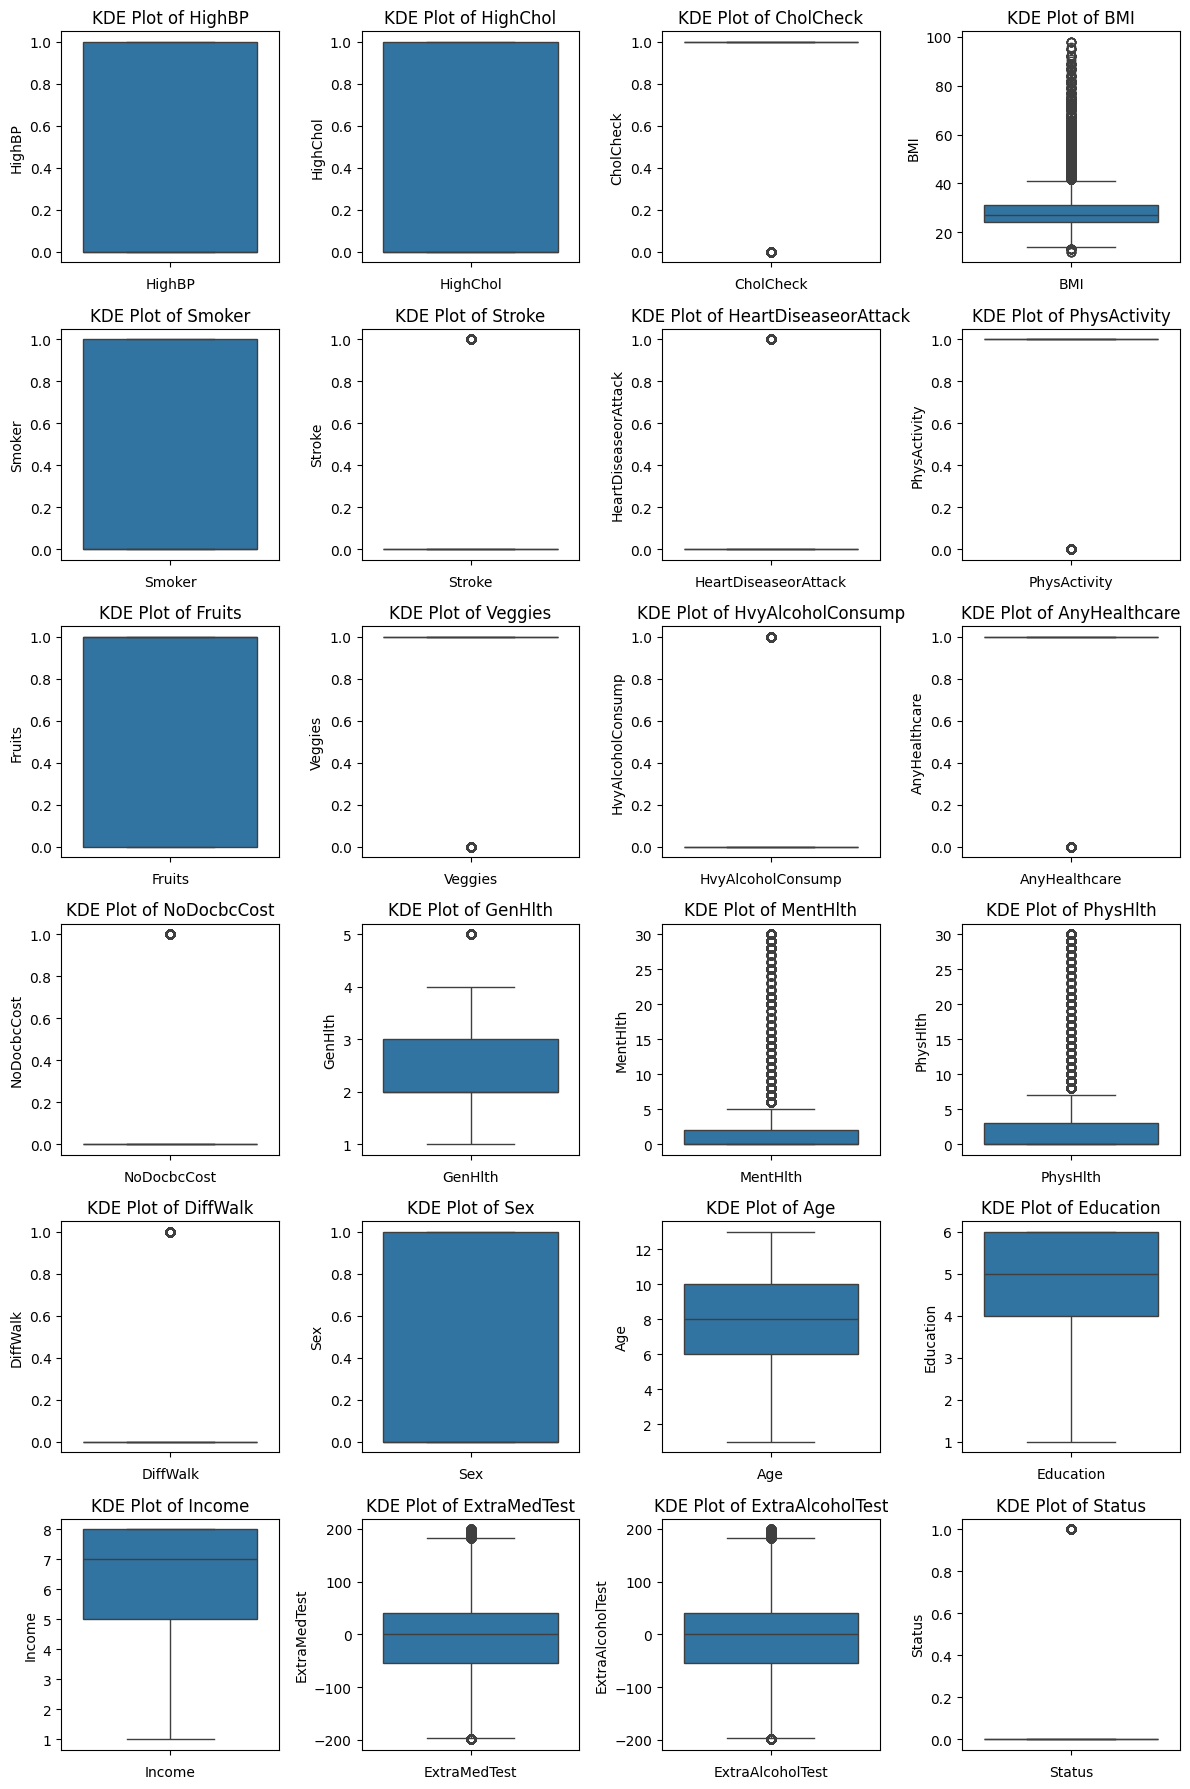

In [18]:
# Step 6: Handle Outliers

# Grid initilization
rows, cols = len(df.columns) // 4, 4

fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 3))

for i, (column, ax) in enumerate(zip(df.columns, axes.flatten())):
    sns.boxplot(data=df[column], ax=ax)
    ax.set_title(f"KDE Plot of {column}")
    ax.set_xlabel(column)

plt.tight_layout()
plt.show()

In [19]:
# Step 7: Handle categorical data

# Create one-hot encoding
age_dummies = pd.get_dummies(df["Age"]).astype(int)
gen_health_dummies = pd.get_dummies(df["GenHlth"]).astype(int)
education_dummies = pd.get_dummies(df["Education"]).astype(int)
income_dummies = pd.get_dummies(df["Income"]).astype(int)

# Rename the columns
gen_health_dummies.columns = [
    "Genhlth_1",
    "Genhlth_2",
    "Genhlth_3",
    "Genhlth_4",
    "Genhlth_5",
]

age_dummies.columns = [
    "Age_18_24",
    "Age_25_29",
    "Age_30_34",
    "Age_35_39",
    "Age_40_44",
    "Age_45_49",
    "Age_50_54",
    "Age_55_59",
    "Age_60_64",
    "Age_65_69",
    "Age_70_74",
    "Age_75_79",
    "Age_80_or_older",
]

education_dummies.columns = [
    "Educ_Never",
    "Educ_G1_8",
    "Educ_G9_11",
    "Educ_G12_GED",
    "Educ_Col_1_3",
    "Educ_Col_4_more",
]

income_dummies.columns = [
    "Inc_1",
    "Inc_2",
    "Inc_3",
    "Inc_4",
    "Inc_5",
    "Inc_6",
    "Inc_7",
    "Inc_8",
]

# Drop the original
df.drop(["Education", "Income", "Age", "GenHlth"], axis=1, inplace=True)

# Concatenate the original DataFrame
df = pd.concat(
    [df, age_dummies, gen_health_dummies, education_dummies, income_dummies], axis=1
)

In [20]:
df.to_csv("../data/processed/data_train_processed.csv")